In [35]:
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
from n2lite import n2lite
import pickle

path = '20181110_041520'


_d_roach = n2lite.N2lite('/home/amigos/data/sql/hemt_sweep/'+path+'/roach2.db')
_D_roach = _d_roach.read_pandas_all()
d = n2lite.N2lite('/home/amigos/data/sql/hemt_sweep/'+path+'/param.db')
D = d.read_pandas_all()

In [3]:
D_roach = _D_roach['data5_1']
t_roach = _D_roach['time5_1']
t_roach = t_roach-t_roach[0]
D_roach = [pickle.loads(_) for _ in D_roach]
D['time'] = D['time']-D['time'][0]
# set tuning param

initial_vg1 = -2.0
final_vg1 = 2.0
initial_vg2 = -2.0
final_vg2 = 2.0
step = 0.1
roop_vg1 = int((final_vg1- initial_vg1) / step) + 1
roop_vg2 = int((final_vg2- initial_vg2) / step) + 1
bins_vg1 = numpy.arange(initial_vg1, final_vg2 + 0.1, 0.1)
bins_vg2 = numpy.arange(initial_vg2, final_vg2 + 0.1, 0.1)

In [4]:
offset_hot_vg1 =  - (final_vg1 + numpy.mean(D['hemt_vg1_5r'][0:100]))
offset_hot_vg2 = - (final_vg2 + numpy.mean(D['hemt_vg2_5r'][0:100]))
D['hemt_vg1_5r'] = D['hemt_vg1_5r'] + offset_hot_vg1
D['hemt_vg2_5r'] = D['hemt_vg2_5r'] + offset_hot_vg2

In [5]:
step = 0.1
def sort_vg1(x):
    mask = 0.05
    for i in range(len(bins_vg1)):
        if x >= bins_vg1[i] - mask and x < bins_vg1[i] + mask: return i
        continue
def sort_vg2(x):
    mask = 0.05
    for i in range(len(bins_vg2)):
        if x >= bins_vg2[i] - mask and x < bins_vg2[i] + mask: return i
        continue

In [6]:
D['x'] = D['hemt_vg1_5r'].apply(sort_vg1)
D['y'] = D['hemt_vg2_5r'].apply(sort_vg2)

In [7]:
D_roach_sum = [sum(D_roach[i]) for i in range(len(D_roach))]
D_roach_data = pandas.DataFrame(D_roach_sum)
roach = pandas.concat([t_roach,D_roach_data],axis =1)
roach.columns = ['data_time','power']

In [8]:
_D_min = [[min(D['time'][D['x']==_x][D['y']==_y]) for _y in range(len(bins_vg1))] for _x in range(len(bins_vg1))]
D_min = []
for i in range(len(_D_min)):
    D_min.append(_D_min[i])

41

In [22]:
def roach_vg1(x):
    for i in range(len(D_min)):
        if x >= min(D_min[i]) and x < max(D_min[i]) :return i
        continue

def roach_vg2(x):
    for i in range(len(D_min)-1):
        for j in range(len(D_min)-1):
            if x >=D_min[i][j] and x < D_min[i][j+1]:
                return j
            elif x >=D_min[i][40] and x < D_min[i+1][0]: 
                return j+1
            elif x >=D_min[40][j] and x < D_min[40][j+1]:
                return j
            elif x > D_min[40][40]:
                return 40.0

In [23]:
roach['x'] = roach['data_time'].apply(roach_vg1)
roach['y'] = roach['data_time'].apply(roach_vg2)

In [24]:
idx = [[roach['y'][roach['y'] == _y][roach['x'] == _x].index for _y in range(41)] for _x in range(41)]

In [29]:
idx

[[Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
  Int64Index([12, 13, 14, 15, 16], dtype='int64'),
  Int64Index([17, 18, 19, 20, 21], dtype='int64'),
  Int64Index([22, 23, 24, 25, 26], dtype='int64'),
  Int64Index([27, 28, 29, 30, 31], dtype='int64'),
  Int64Index([32, 33, 34, 35, 36], dtype='int64'),
  Int64Index([37, 38, 39, 40, 41], dtype='int64'),
  Int64Index([42, 43, 44, 45, 46], dtype='int64'),
  Int64Index([47, 48, 49, 50, 51], dtype='int64'),
  Int64Index([52, 53, 54, 55, 56], dtype='int64'),
  Int64Index([57, 58, 59, 60, 61], dtype='int64'),
  Int64Index([62, 63, 64, 65, 66], dtype='int64'),
  Int64Index([67, 68, 69, 70, 71], dtype='int64'),
  Int64Index([72, 73, 74, 75, 76], dtype='int64'),
  Int64Index([77, 78, 79, 80, 81], dtype='int64'),
  Int64Index([82, 83, 84, 85, 86], dtype='int64'),
  Int64Index([87, 88, 89, 90, 91], dtype='int64'),
  Int64Index([92, 93, 94, 95, 96], dtype='int64'),
  Int64Index([97, 98, 99, 100, 101], dtype='int64'),
  Int64Inde

In [234]:
_amp = [[(roach['power'][roach['y'] == _y][roach['x'] == _x]) for _y in range(41)] for _x in range(41)]
amp = [[[numpy.mean(_amp[j][i])] for i in range(41) ] for j in range(41)]

[[0     382541594
  1     388009447
  2     515201824
  3      99607276
  4       3784838
  5       3731444
  6       3686419
  7       3672234
  8       3708953
  9       3712380
  10      3707537
  11      3708312
  Name: power, dtype: int64, 12    3716415
  13    3707415
  14    3692367
  15    3706195
  16    3710758
  Name: power, dtype: int64, 17    3704722
  18    3716416
  19    3710841
  20    3705403
  21    3712621
  Name: power, dtype: int64, 22    3714738
  23    3723035
  24    3798052
  25    3778930
  26    3776302
  Name: power, dtype: int64, 27    3764960
  28    3753828
  29    3776884
  30    3778607
  31    3777655
  Name: power, dtype: int64, 32    3795186
  33    3790132
  34    3780834
  35    3783045
  36    3795095
  Name: power, dtype: int64, 37    3793011
  38    3770971
  39    3788379
  40    3790860
  41    3783631
  Name: power, dtype: int64, 42    3767891
  43    3781865
  44    3782175
  45    3787816
  46    3774416
  Name: power, dtype: int64, 47    

In [243]:
type(_amp[0][0])

pandas.core.series.Series

In [232]:
a = roach[roach['y']==1][roach['x']==3]
a

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,data_time,power,x,y
627,250.888486,3680869,3.0,1.0
628,251.288486,3680372,3.0,1.0
629,251.688486,3675236,3.0,1.0
630,252.088486,3687648,3.0,1.0
631,252.488486,3679473,3.0,1.0
632,252.835579,3682251,3.0,1.0
633,253.235579,3676371,3.0,1.0
634,253.635579,3672834,3.0,1.0
635,254.035579,3707695,3.0,1.0
636,254.435579,3799279,3.0,1.0


In [226]:
vg1 = [[[numpy.mean(D['hemt_vg1_5r'][D['x']== _x][D['y']== _y])] for _y in range(41) ] for _x in range(41)]
vg2 = [[[numpy.mean(D['hemt_vg2_5r'][D['x']== _x][D['y']== _y])] for _y in range(41) ] for _x in range(41)]

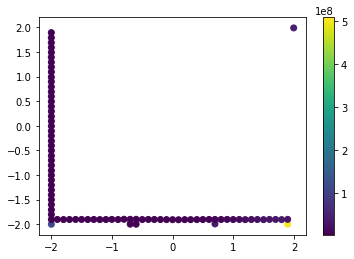

In [227]:
plt.scatter(vg1, vg2, c=amp)
#matplotlib.pyplot.clim(5e16,2e17)
plt.colorbar()

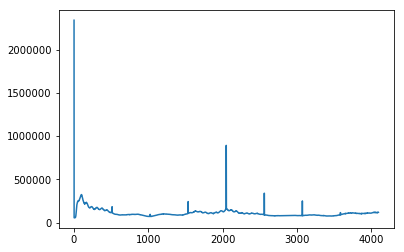

In [40]:
bin = range(1,4097)
plt.plot(bin,DD[0])
plt.show()